# Tutorial 3 - Histogramas & Box Plot

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Dataset

Dataset usado para os exemplos a seguir.

In [5]:
""" DataFrame contendo 5 Séries com Distribuições Normais distintas """
df = pd.DataFrame(
    columns=["S1", "S2", "S3", "S4", "S5"],
    data=(np.random.randn(100, 5) * np.array([10, 15, 50, 100, 200]) + np.array([0, 5, 30, 30, 50]))
)

# Histogram Plot

## Matplotlib Puro

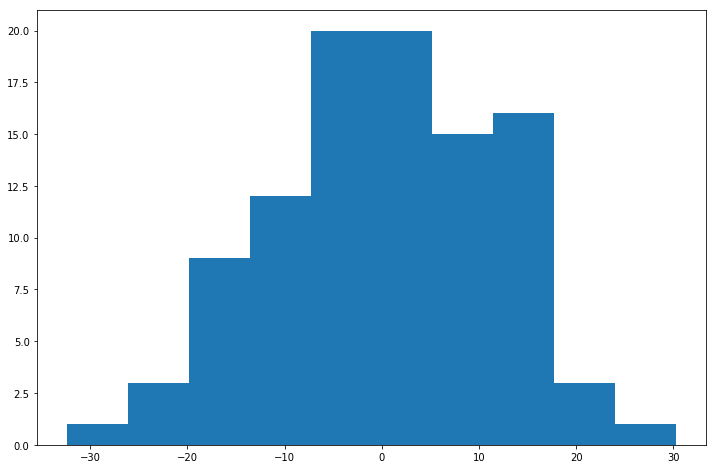

In [6]:
""" Histograma sem Normalização:
    Eixo Y é a contagem de elementos dentro de cada `bucket`.
"""
plt.figure(figsize=(12,8))

plt.hist(df.S1, bins=10)

plt.show()

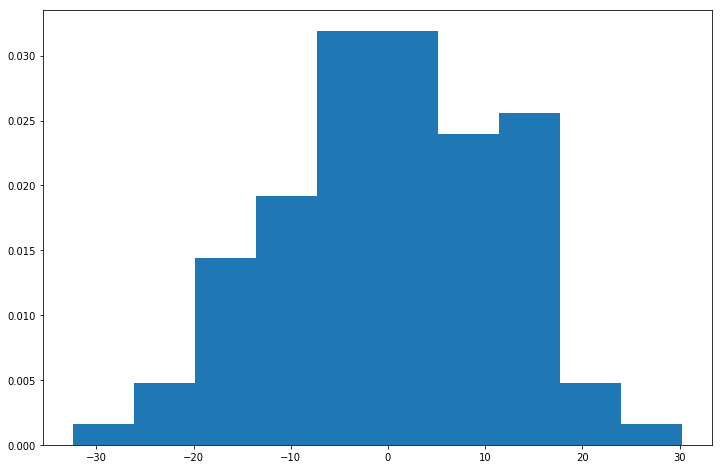

count    100.000000
mean       0.178176
std       11.359904
min      -32.394451
25%       -7.188350
50%       -0.158496
75%        8.582194
max       30.235665
Name: S1, dtype: float64

In [7]:
""" Histograma com Normalização:
    Eixo Y é o percentual de elementos dentro de cada `bucket`."""
plt.figure(figsize=(12,8))

plt.hist(df.S1, bins=10, normed=True)

plt.show()
df.S1.describe()

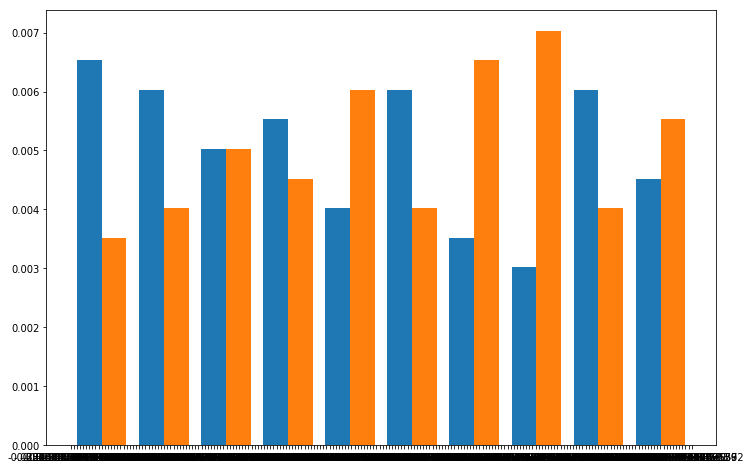

,S1,S2
count,100.000000,100.000000
mean,0.178176,2.929134
std,11.359904,14.462472
min,-32.394451,-37.882003
25%,-7.188350,-6.646959
50%,-0.158496,3.439896
75%,8.582194,14.020930
max,30.235665,34.210342


In [8]:
""" Histograma de duas Séries """
plt.figure(figsize=(12,8))

plt.hist(df[["S1", "S2"]], bins=10, normed=True)

plt.show()
df[["S1", "S2"]].describe()

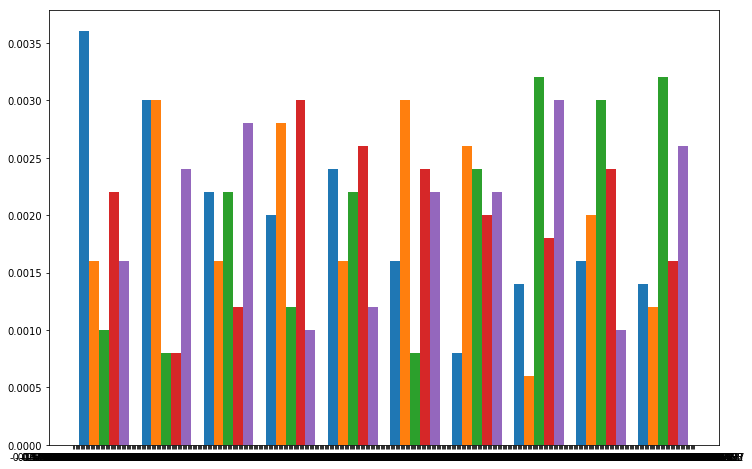

,S1,S2,S3,S4,S5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178176,2.929134,26.945828,32.732826,55.713625
std,11.359904,14.462472,47.655985,103.690127,186.683770
min,-32.394451,-37.882003,-110.141528,-189.167819,-375.040740
25%,-7.188350,-6.646959,-1.198993,-38.829542,-49.743941
50%,-0.158496,3.439896,28.750603,29.936039,54.358937
75%,8.582194,14.020930,57.515070,96.322618,160.398402
max,30.235665,34.210342,142.730971,331.299434,543.477197


In [9]:
""" Histograma de mais de duas Séries """
plt.figure(figsize=(12,8))

plt.hist(df, bins=10, normed=True)

plt.show()
df.describe()

### Observação:

A visualização do histograma de várias séries é muito confusa usando o matplotlib sozinho. Às vezes é preferível usar uma visualização em uma janela só, como mostrada abaixo. 

**Importante**: Na visualização abaixo, sempre deve-se configurar o `alpha` (transparência) abaixo de `1.0`; caso contrário, um dos histogramas irá sobrepor o outro.

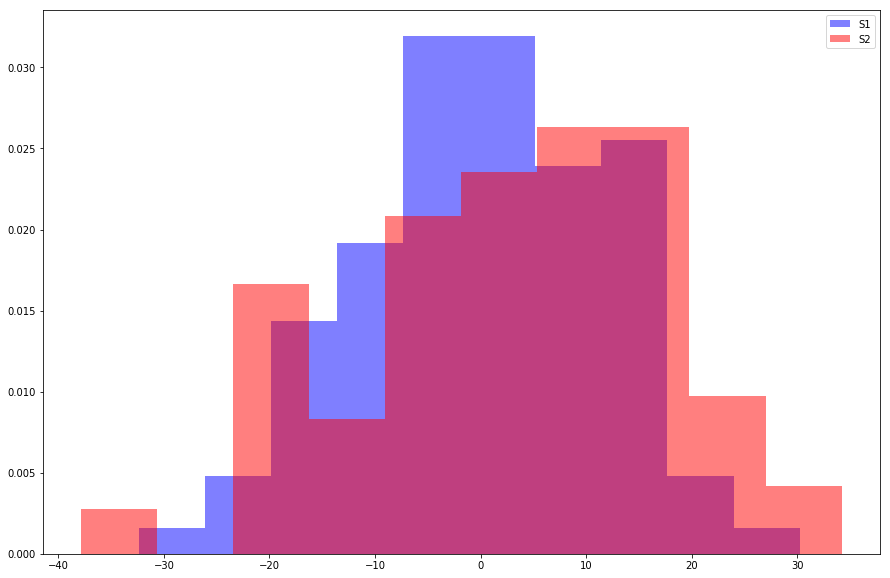

In [10]:
plt.figure(figsize=(15,10))

plt.hist(df.S1, bins=10, normed=True, color="blue", alpha=0.5, label="S1")
plt.hist(df.S2, bins=10, normed=True, color="red", alpha=0.5, label="S2")
plt.legend()
plt.show()

## Usando Pandas

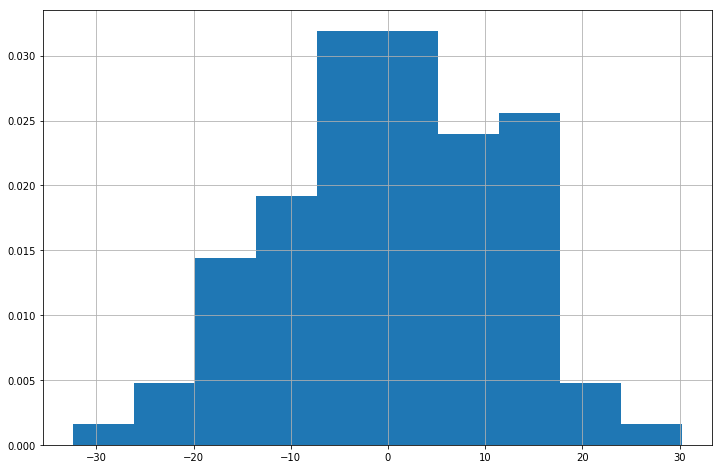

In [11]:
""" Uma Série """
df.S1.hist(bins=10, normed=True, figsize=(12,8))

plt.show()

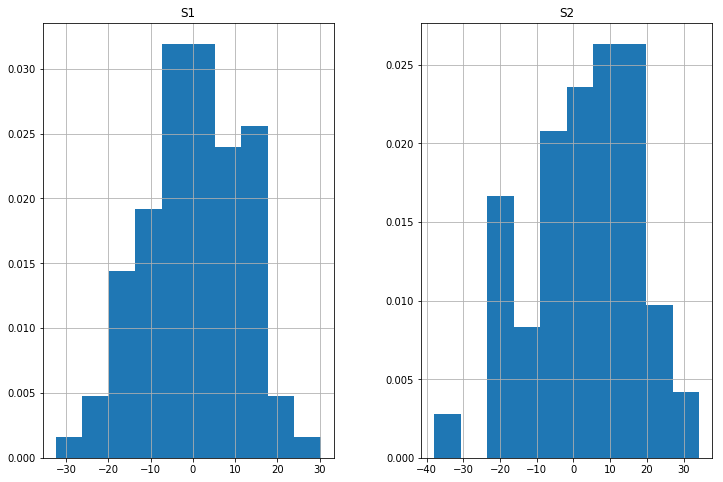

,S1,S2
count,100.000000,100.000000
mean,0.178176,2.929134
std,11.359904,14.462472
min,-32.394451,-37.882003
25%,-7.188350,-6.646959
50%,-0.158496,3.439896
75%,8.582194,14.020930
max,30.235665,34.210342


In [12]:
""" Histograma de duas Séries """
df[["S1", "S2"]].hist(bins=10, normed=True, figsize=(12,8))

plt.show()
df[["S1", "S2"]].describe()

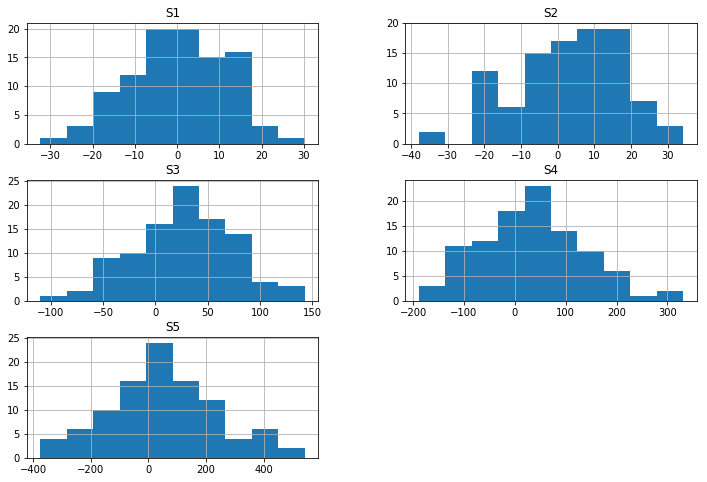

,S1,S2,S3,S4,S5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178176,2.929134,26.945828,32.732826,55.713625
std,11.359904,14.462472,47.655985,103.690127,186.683770
min,-32.394451,-37.882003,-110.141528,-189.167819,-375.040740
25%,-7.188350,-6.646959,-1.198993,-38.829542,-49.743941
50%,-0.158496,3.439896,28.750603,29.936039,54.358937
75%,8.582194,14.020930,57.515070,96.322618,160.398402
max,30.235665,34.210342,142.730971,331.299434,543.477197


In [13]:
""" Histograma de mais de duas Séries """
df.hist(bins=10, figsize=(12,8))

plt.show()
df.describe()

## Usando Seaborn

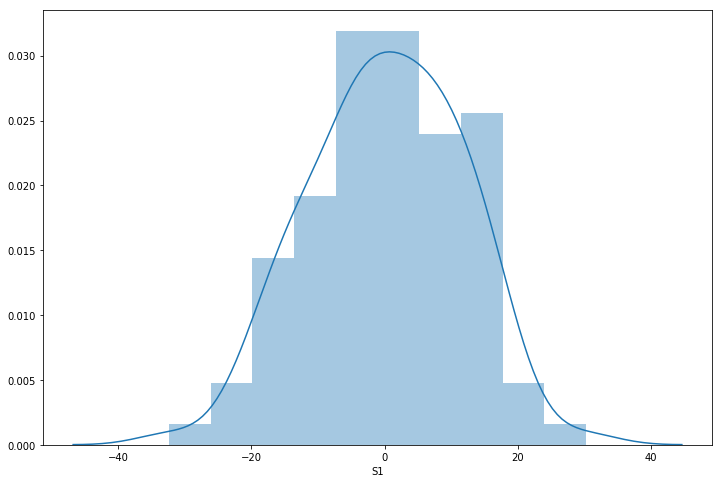

In [14]:
""" Uma Série """
plt.figure( figsize=(12,8))

sns.distplot(df.S1)

plt.show()

### Observação:

Seaborn não suporta hist plot de várias colunas de um DataFrame automaticamente

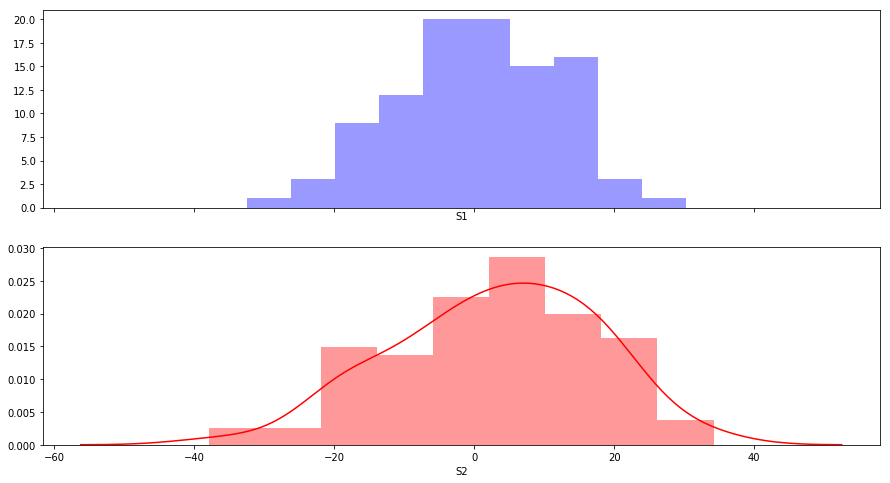

,S1,S2
count,100.000000,100.000000
mean,0.178176,2.929134
std,11.359904,14.462472
min,-32.394451,-37.882003
25%,-7.188350,-6.646959
50%,-0.158496,3.439896
75%,8.582194,14.020930
max,30.235665,34.210342


In [15]:
""" Histograma de duas Séries (1) """
plt.figure( figsize=(12,8))

f, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

sns.distplot(df.S1, kde=False, color="blue", ax=axes[0])
sns.distplot(df.S2, kde=True, color="red", ax=axes[1])

plt.show()
df[["S1", "S2"]].describe()

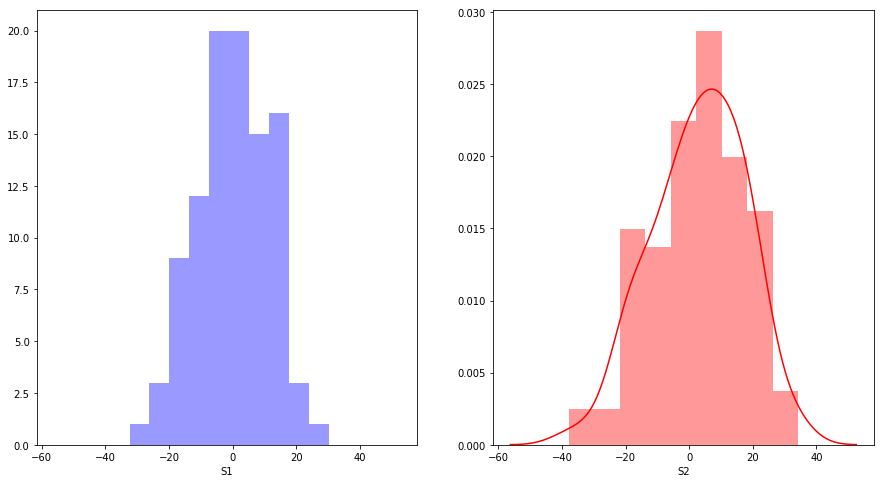

,S1,S2
count,100.000000,100.000000
mean,0.178176,2.929134
std,11.359904,14.462472
min,-32.394451,-37.882003
25%,-7.188350,-6.646959
50%,-0.158496,3.439896
75%,8.582194,14.020930
max,30.235665,34.210342


In [16]:
""" Histograma de duas Séries (1) """

f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)

sns.distplot(df.S1, kde=False, color="blue", ax=axes[0])
sns.distplot(df.S2, kde=True, color="red", ax=axes[1])

plt.show()
df[["S1", "S2"]].describe()

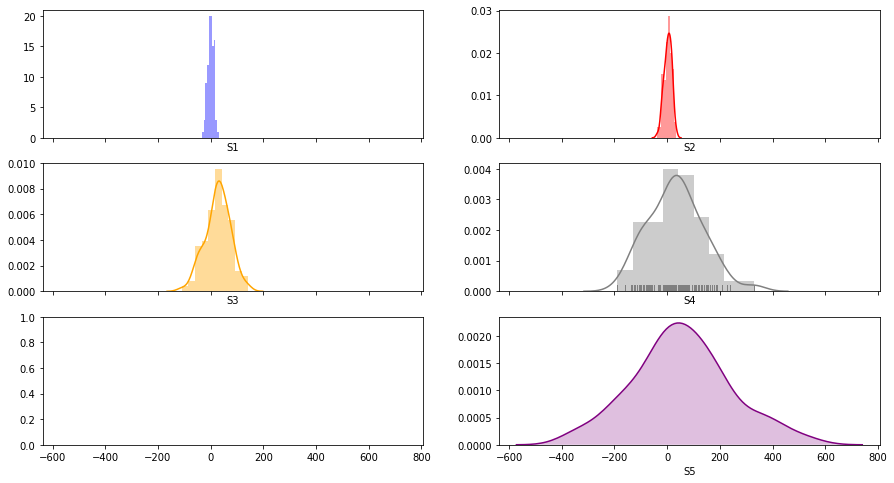

,S1,S2
count,100.000000,100.000000
mean,0.178176,2.929134
std,11.359904,14.462472
min,-32.394451,-37.882003
25%,-7.188350,-6.646959
50%,-0.158496,3.439896
75%,8.582194,14.020930
max,30.235665,34.210342


In [17]:
""" Histograma de mais de duas Séries """

plt.figure( figsize=(12,8))

f, axes = plt.subplots(3, 2, figsize=(15, 8), sharex=True)

sns.distplot(df.S1, kde=False, color="blue", ax=axes[0, 0])
sns.distplot(df.S2, kde=True, color="red", ax=axes[0, 1])
sns.distplot(df.S3, kde=True, color="orange", ax=axes[1, 0])
sns.distplot(df.S4, kde=True, rug=True, color="gray", ax=axes[1, 1])
sns.distplot(df.S5, hist=False, kde_kws={"shade": True}, color="purple", ax=axes[2, 1])

plt.show()
df[["S1", "S2"]].describe()

# Box Plot

## Matplotlib Puro

### Uma Série

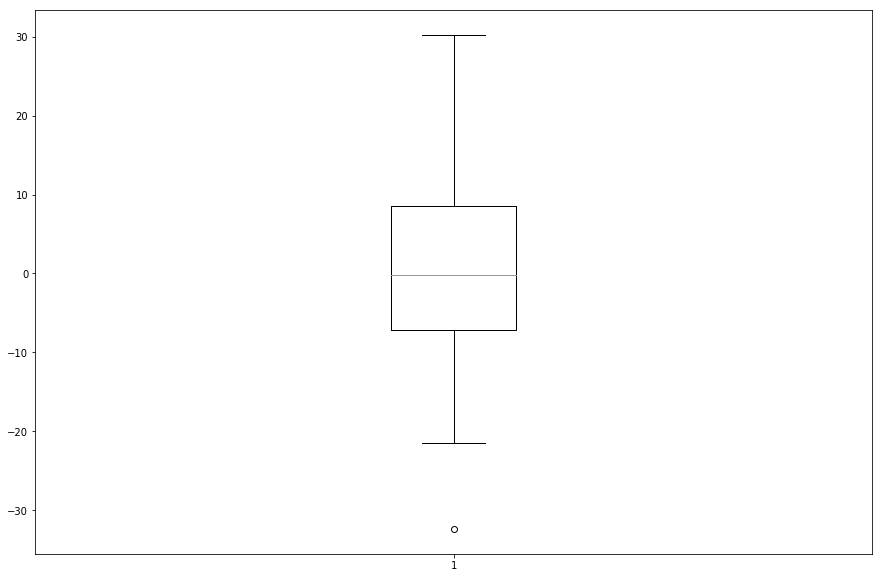

In [18]:
""" default: vertical """
plt.figure(figsize=(15,10))

plt.boxplot(df.S1)

plt.show()

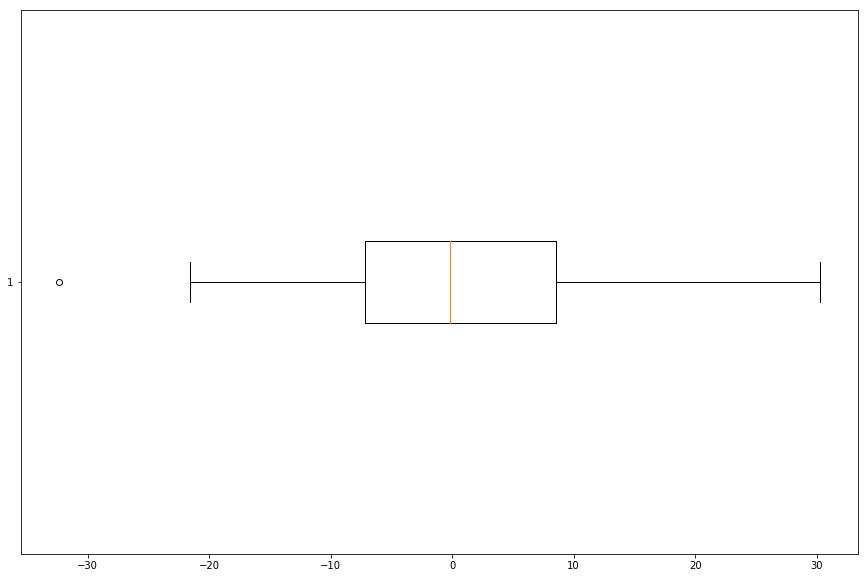

In [19]:
""" horizontal pra variar """

plt.figure(figsize=(15,10))

plt.boxplot(df.S1, vert=False)

plt.show()

### Mais Séries

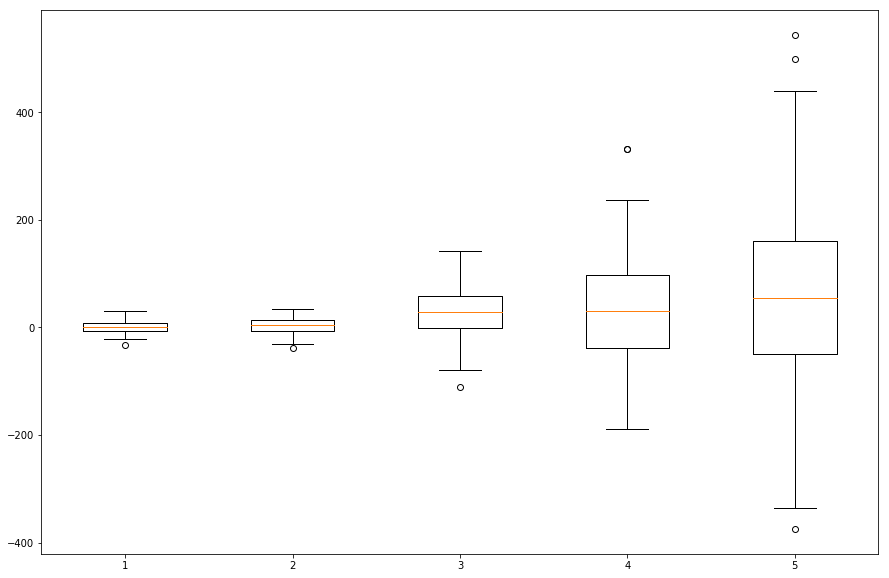

In [20]:
plt.figure(figsize=(15,10))

plt.boxplot(df.T)

plt.show()

### Outliers!!!

In [21]:
tmp1 = df[["S1", "S2"]]
tmp2 = df[["S3", "S3"]]
tmp2.columns = tmp1.columns  # append com colunas iguais não cria NaNs 

tmp = tmp1.append(tmp2)

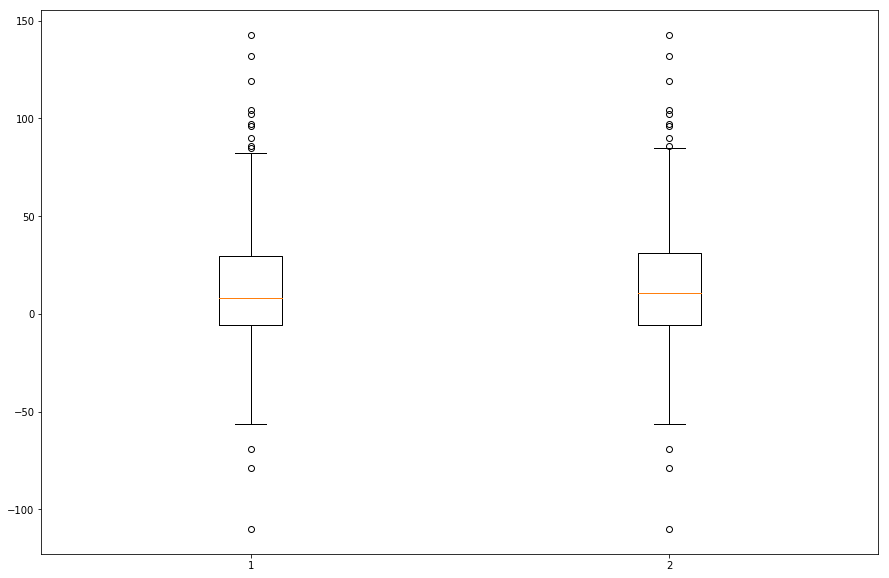

,S1,S2
count,200.000000,200.000000
mean,13.562002,14.937481
std,37.068404,37.132482
min,-110.141528,-110.141528
10%,-20.680754,-21.593291
20%,-11.089572,-10.406258
30%,-3.991741,-1.517588
40%,2.313247,5.920282
50%,8.006362,10.527072
60%,13.176008,16.296196


In [22]:
plt.figure(figsize=(15,10))

plt.boxplot(tmp.T)

plt.show()
tmp.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Pandas for the Go!

#### Todos Juntos e com Labels!

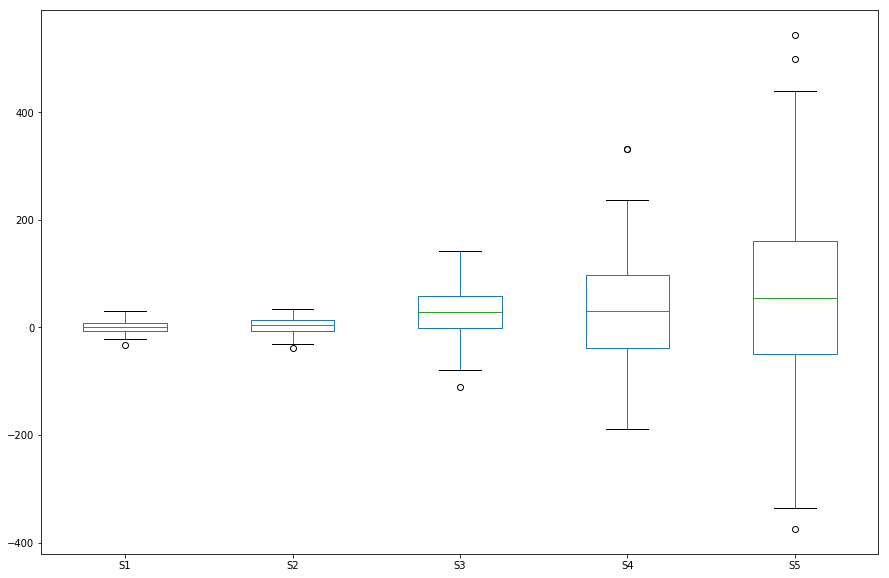

In [23]:
df.plot(kind="box", figsize=(15,10))
plt.show()

### Outliers!!!

In [24]:
tmp1 = df.copy()
tmp2 = df[["S5", "S5", "S5", "S5", "S5"]]
tmp2.columns = tmp1.columns  # append com colunas iguais não cria NaNs 

tmp = tmp1.append(tmp2)

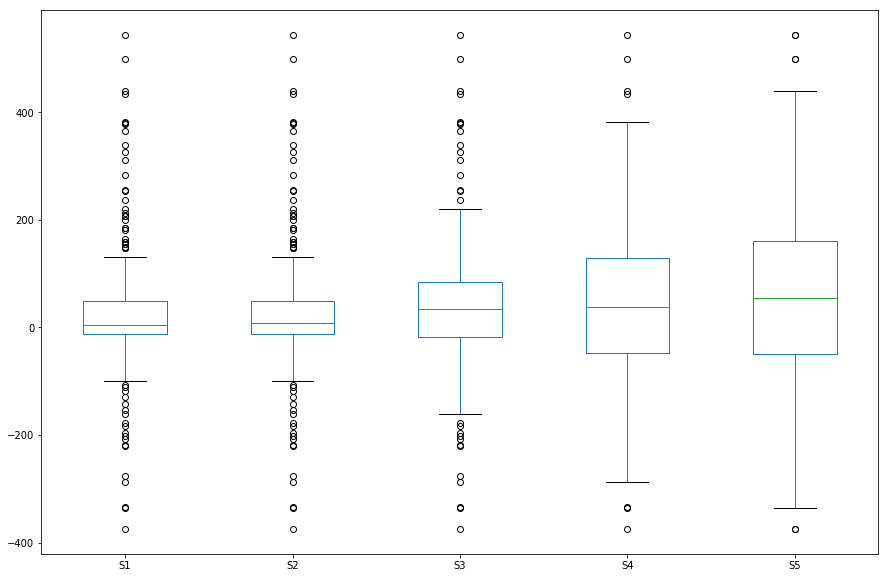

,S1,S2,S3,S4,S5
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,27.945901,29.321380,41.329726,44.223226,55.713625
std,134.821996,134.692082,136.658796,151.060749,186.214124
min,-375.040740,-375.040740,-375.040740,-375.040740,-375.040740
10%,-93.478028,-93.478028,-100.864597,-127.327769,-185.372157
20%,-16.578216,-18.445589,-32.551124,-73.310865,-94.213233
30%,-7.544853,-7.065118,-5.086711,-25.000846,-28.734530
40%,-2.126812,0.896189,15.855026,5.206187,3.717587
50%,3.940865,7.316555,34.739271,37.846458,54.358937
60%,9.197129,15.060323,51.135340,72.655837,84.454377


In [25]:
plt.figure(figsize=(15,10))

tmp.plot(kind="box", figsize=(15,10))

plt.show()
tmp.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Seaborn

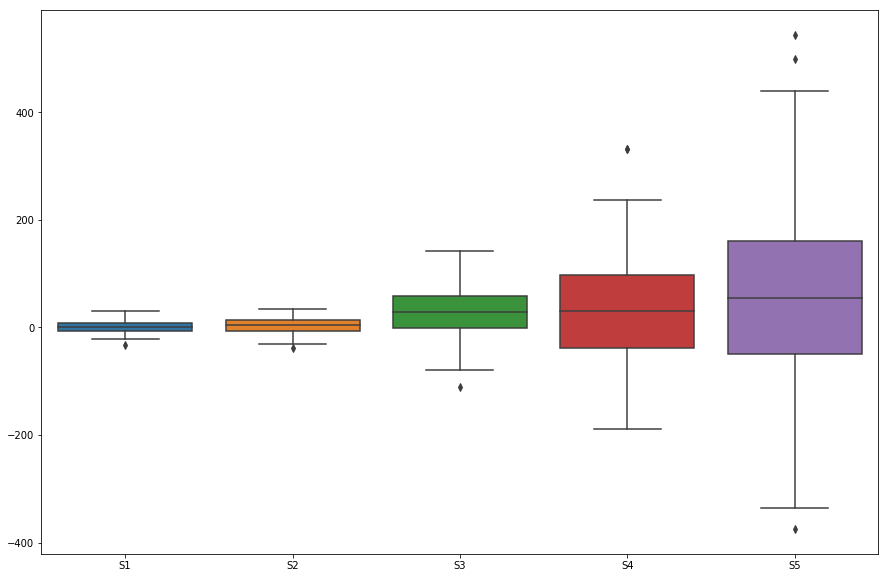

In [26]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df)

plt.show()